# HW1

## Problem 1
Assume: \\
$P(s)=$ person who claims to have been to the same school as you \\
$P(r)=$ people you vaguely recognize. \\
Then we have, $P(r|s)=\frac{1}{2}$, $P(s)=\frac{1}{10}$, and $P(r)=\frac{1}{5}$. Thus, $P(s|r)=\frac{P(r|s)P(s)}{P(r)}=\frac{1/2\cdot 1/10}{1/5}=\frac{1}{4}=0.25$.

## Problem 2
$R(H) = HH\cdot P(H) + CH\cdot P(C) + LCH\cdot P(LC)=0\cdot 0.5+5\cdot 0.2+20\cdot 0.3=7$
$R(C) = HC\cdot P(H) + CC\cdot P(C) + LCC\cdot P(LC)=1\cdot 0.5+0\cdot 0.2+10\cdot 0.3=3.5$
$R(LC) = HLC\cdot P(H) + CLC\cdot P(C) + LCLC\cdot P(LC)=5\cdot 0.5+3\cdot 0.2+0\cdot 0.3=3.1$ \\
Thus, liver cancer shuld be output of the prediction with the minimum risk.

## Problem 3
|                 |Stolen|Not Stolen|
|     ---         |    ---   |         ---       |
|Red           |$\frac{3}{5}$ |$\frac{2}{5}$|
|Yellow      |$\frac{2}{5}$ | $\frac{3}{5}$|
|Sports      |$\frac{4}{6}$ |$\frac{2}{6}$ |
|Family      |$\frac{1}{4}$ |$\frac{3}{4}$ |
|Domestic| $\frac{2}{5}$|$\frac{3}{5}$ |
|Imported | $\frac{3}{5}$| $\frac{2}{5}$|

Thus: \\
$P(Stolen|{Red, Family, Domestic})=\frac{3}{5}\cdot\frac{1}{4}\cdot\frac{2}{5}\cdot\frac{5}{10}=0.03$
$P(Not Stolen|{Red, Family, Domestic})=\frac{2}{5}\cdot\frac{3}{4}\cdot\frac{3}{5}\cdot\frac{5}{10}=0.09$

## Problem 4

Estimated
 (mu1, sigma1): (0.4271622360593517, 1.1880761609232735)
 (mu2, sigma2): (0.047225006423139246, 0.9255463334813501)
 (mu3, sigma3): (0.5955387498467847, 0.7929362690150117)


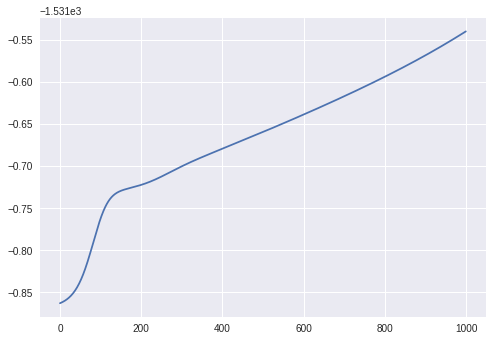

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# set random seed so that everytime we get the same result
np.random.seed(1)

# prepare simulation data
N1 = 1000
N2 = 1000
N3 = 1000
N = N1 + N2 + N3
real_mu1 = 0.1
real_std1 = 1
real_mu2 = 0.3
real_std2 = 1
real_mu3 = 0.6
real_std3 = 1
y = np.concatenate((np.random.normal(real_mu1, real_std1, N1), 
                    np.random.normal(real_mu2, real_std2, N2), 
                    np.random.normal(real_mu3, real_std3, N3)))


# EM algorithm

# Initialization
nits = 1000
count = 0 # should be initialized as 0
p1 = 0.5
p2 = 0.5
p3 = 0.5
mu1 = np.random.random()
mu2 = np.random.random()
mu3 = np.random.random()
s1 = np.std(y)
s2 = s1
s3 = s2
ll = np.zeros(nits)
gamma1 = np.zeros(N)
gamma2 = np.zeros(N)
gamma3 = np.zeros(N)

while count < nits:
    count = count + 1
    # E-step
    for i in range(N):
        num1 = p1 * np.exp(-(y[i]-mu1)**2/(2*s1)) / np.sqrt(s1)
        num2 = p2 * np.exp(-(y[i]-mu2)**2/(2*s2)) / np.sqrt(s2)
        num3 = p3 * np.exp(-(y[i]-mu3)**2/(2*s3)) / np.sqrt(s3)
        gamma1[i] = num1 / (num1 + num2 + num3)
        gamma2[i] = num2 / (num1 + num2 + num3)
        gamma3[i] = num3 / (num1 + num2 + num3)
    # M-step
    mu1 = np.sum(gamma1*y) / np.sum(gamma1)
    mu2 = np.sum(gamma2*y) / np.sum(gamma2)
    mu3 = np.sum(gamma3*y) / np.sum(gamma3)
    s1 = np.sum(gamma1*(y-mu1)**2) / np.sum(gamma1)
    s2 = np.sum(gamma2*(y-mu2)**2) / np.sum(gamma2)
    s3 = np.sum(gamma3*(y-mu3)**2) / np.sum(gamma3)
    p1 = np.sum(gamma1) / N
    p2 = np.sum(gamma2) / N
    p3 = np.sum(gamma3) / N
    ll[count - 1] = np.sum(np.log(p1*np.exp(-(y-mu1)**2/(2*s1)) / np.sqrt(s1) + 
                                  p2*np.exp(-(y-mu2)**2/(2*s2)) / np.sqrt(s2) + 
                                  p3*np.exp(-(y-mu3)**2/(2*s3)) / np.sqrt(s3)))
    
    
print('Estimated\n (mu1, sigma1): (%s, %s)\n (mu2, sigma2): (%s, %s)\n (mu3, sigma3): (%s, %s)' % 
      (mu1, s1, mu2, s2, mu3, s3))     
plt.plot(range(nits), ll)

## Problem 5
---
$w_1 : -1\times 1.5+0\times 1+0\times 1 = -1.5 < 0\rightarrow w_1 = 0$ \\
$w_2 : -1\times 1.5+0\times 0+0\times 1 = -1.5 < 0\rightarrow w_2 = 0$

---
$w_1 : -1\times 1.5+1\times 1+0\times 1 = -0.5 < 0\rightarrow w_1 = 0$ \\
$w_2 : -1\times 1.5+1\times 0+0\times 1 = -1.5 < 0\rightarrow w_2 = 0$

---
$w_1 : -1\times 1.5+0\times 1+1\times 1 = -0.5 < 0\rightarrow w_1 = 0$ \\
$w_2 : -1\times 1.5+0\times 0+1\times 1 = -0.5 < 0\rightarrow w_2 = 0$

---
$w_1 : -1\times 1.5+1\times 1+1\times 1 = 0.5 > 0\rightarrow w_1 = 1$ \\
$w_2 : -1\times 1.5+1\times 1+1\times 1 = 0.5 > 0\rightarrow w_2 = 1$ 

---

Thus, the function is $y=-x+1.5$ \\
![alt text](http://mypage.iu.edu/~siyixian/B455_HW1_P5.png)

## Problem 6
Like polt below it is impossible to classfied $(1, 1)$, $(1, 3)$, $(3, 1)$, and $(3, 3)$ in 2-dimension. But when we extend a dimension. we can find module wich is $w_1 = 1$, $w_2=1$, $w_3=-1$, $bais = 0$ can classify this dataset.

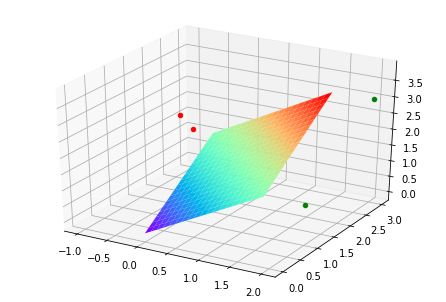

In [0]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(0, 2, 0.1)
Y = np.arange(0, 2, 0.1)
X, Y = np.meshgrid(X, Y)
Z = X + Y
 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
ax.scatter(2, 1, 1, c='g')
ax.scatter(0, 1, 3, c='r')
ax.scatter(-1, 3, 1, c='r')
ax.scatter(2, 3, 3, c='g')
plt.show()

## Problem 7

Assume there is another point on hyperplane $X = \vec{x}$. $d=|\vec{XX'}|\cdot cos \theta=\frac{||w||\cdot|\vec{XX'}|\cdot cos\theta}{||w||}=\frac{|w^Tx-w^Tx'|}{||w||}$. Becasue, $X$ is on hyperplane, then $w^Tx=-b$. Thus, $d=\frac{|w^Tx'+b|}{||w||}=\frac{|y(X')|}{||w||}$.